In [40]:
import pandas as pd
import pickle
import numpy as np
import datetime
from pprint import pprint

In [122]:
with open('raw_data/train_nextDayPlayerEngagement.pkl', 'rb') as pkl:
    train_nextDayPlayerEngagement = pickle.load(pkl)

with open('raw_data/train_playerBoxScores.pkl', 'rb') as pkl:
    train_playerBoxScores = pickle.load(pkl)
    
with open('raw_data/train_teamBoxScores.pkl', 'rb') as pkl:
    train_teamBoxScores = pickle.load(pkl)

players = pd.read_csv('raw_data/players.csv')

with open('raw_data/train_playerTwitterFollowers.pkl', 'rb') as pkl:
    train_playerTwitterFollowers = pickle.load(pkl)

with open('raw_data/train_teamTwitterFollowers.pkl', 'rb') as pkl:
    train_teamTwitterFollowers = pickle.load(pkl)


In [126]:
players.describe(include = 'all')

,playerId,playerName,DOB,mlbDebutDate,birthCity,birthStateProvince,birthCountry,heightInches,weight,primaryPositionCode,primaryPositionName,playerForTestSetAndFuturePreds
count,2061.000000,2061,2061,2025,2061,1516,2061,2061.000000,2061.000000,2061,2061,2057
unique,NaN,2055,1670,1166,1027,72,28,NaN,NaN,12,10,2
top,NaN,Luis Garcia,1995-01-17,2020-07-24,Santo Domingo,CA,USA,NaN,NaN,1,Pitcher,True
freq,NaN,3,5,19,53,315,1466,NaN,NaN,1171,1171,1187
mean,587590.916060,NaN,NaN,NaN,NaN,NaN,NaN,73.750607,210.942261,NaN,NaN,NaN
std,71127.947793,NaN,NaN,NaN,NaN,NaN,NaN,2.309101,20.733118,NaN,NaN,NaN
min,112526.000000,NaN,NaN,NaN,NaN,NaN,NaN,66.000000,151.000000,NaN,NaN,NaN
25%,543343.000000,NaN,NaN,NaN,NaN,NaN,NaN,72.000000,196.000000,NaN,NaN,NaN
50%,605388.000000,NaN,NaN,NaN,NaN,NaN,NaN,74.000000,210.000000,NaN,NaN,NaN
75%,642758.000000,NaN,NaN,NaN,NaN,NaN,NaN,75.000000,225.000000,NaN,NaN,NaN


In [120]:
feat = FeatureEngineerer()
X_train_test = feat.transform(X = X_train)

ValueError: invalid literal for int() with base 10: 'O'

In [11]:
train_nextDayPlayerEngagement.head()

,engagementMetricsDate,playerId,target1,target2,target3,target4,index,date
0,2018-01-02,628317,0.011167,4.474708,0.005168,5.735294,0,2018-01-01
1,2018-01-02,547989,0.042993,5.593385,0.045033,2.794118,0,2018-01-01
2,2018-01-02,519317,0.974327,56.177043,13.693746,64.166667,0,2018-01-01
3,2018-01-02,607625,0.006700,2.675097,0.005168,1.862745,0,2018-01-01
4,2018-01-02,592547,0.001117,0.632296,0.002953,0.931373,0,2018-01-01


In [12]:
# primary position name
# team id
train_playerBoxScores.head()

,home,gamePk,gameDate,gameTimeUTC,teamId,teamName,playerId,playerName,jerseyNum,positionCode,...,sacFliesPitching,saves,holds,blownSaves,assists,putOuts,errors,chances,index,date
0,1,529418,2018-03-29,2018-03-29T23:08:00Z,119,Los Angeles Dodgers,605131,Austin Barnes,15,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87,2018-03-29
1,1,529406,2018-03-29,2018-03-29T20:00:00Z,139,Tampa Bay Rays,605480,Mallex Smith,0,7,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,87,2018-03-29
2,0,529416,2018-03-29,2018-03-29T20:10:00Z,143,Philadelphia Phillies,546318,Odubel Herrera,37,8,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,87,2018-03-29
3,0,529412,2018-03-29,2018-03-29T20:05:00Z,108,Los Angeles Angels,527043,Jefry Marte,19,3,...,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0,87,2018-03-29
4,1,529408,2018-03-29,2018-03-29T20:15:00Z,118,Kansas City Royals,449181,Paulo Orlando,16,8,...,NaN,NaN,NaN,NaN,0.0,2.0,0.0,2.0,87,2018-03-29


In [ ]:
train_nextDayPlayerEngagement.describe()

,playerId,target1,target2,target3,target4,index
count,2.506176e+06,2.506176e+06,2.506176e+06,2.506176e+06,2.506176e+06,2.506176e+06
mean,5.875909e+05,5.685204e-01,2.456110e+00,6.880493e-01,1.137044e+00,6.075000e+02
std,7.111070e+04,4.171841e+00,6.234965e+00,5.065297e+00,4.229920e+00,3.510289e+02
min,1.125260e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.433430e+05,0.000000e+00,7.698768e-02,0.000000e+00,5.405405e-02,3.037500e+02
50%,6.053880e+05,1.066894e-03,5.561735e-01,1.692286e-03,2.233539e-01,6.075000e+02
75%,6.427580e+05,1.824177e-02,2.236050e+00,2.083594e-02,7.576614e-01,9.112500e+02
max,6.855030e+05,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.215000e+03


/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


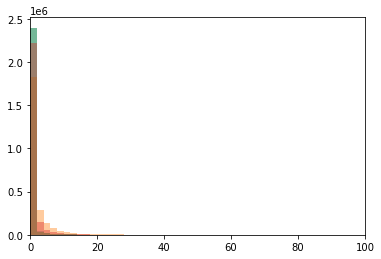

In [15]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

targets = ['target1','target2','target3','target4']

# Make the histogram using a list of lists
# Normalize the flights and assign colors and names
#plt.hist(train_nextDayPlayerEngagement[targets])

fig, ax = plt.subplots()
for tt in targets:
    sns.distplot(train_nextDayPlayerEngagement[[tt]], ax=ax, kde=False)
ax.set_xlim([0, 100])

plt.show()

['log_target1', 'log_target2', 'log_target3', 'log_target4']


/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


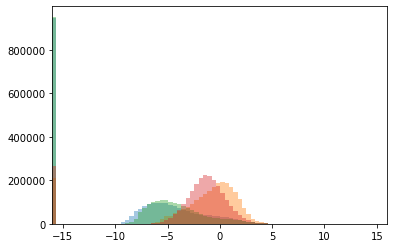

In [ ]:
for i in range(1,5):
    train_nextDayPlayerEngagement['log_target'+str(i)] = np.log(train_nextDayPlayerEngagement['target'+str(i)]+0.0000001)

log_targets = ['log_' + t for t in targets]
print(log_targets)

fig, ax = plt.subplots()
for tt in log_targets:
    sns.distplot(train_nextDayPlayerEngagement[[tt]], ax=ax, kde=False)
ax.set_xlim([-16, 16])

plt.show()

plt.show()

In [18]:
# features

# lags on per player engagement
# lags on mean engagement
def train_lag(df,lag_cols, lag=1):
    dp = df[["playerId","date"]+lag_cols].copy()
    dp["date"]  =dp["date"] + datetime.timedelta(days=lag) 
    df = df.merge(dp, on=["playerId", "date"], suffixes=["",f"_{lag}"], how="left")
    return df
#=================================
def test_lag(sub, lag_cols):
    sub["playerId"] = sub["date_playerId"].apply(lambda s: int(  s.split("_")[1]  ) )
    assert sub.date.nunique() == 1
    dte = sub["date"].unique()[0]
    
    eval_dt = pd.to_datetime(dte, format="%Y%m%d")
    dtes = [eval_dt + datetime.timedelta(days=-k) for k in LAGS]
    mp_dtes = {eval_dt + datetime.timedelta(days=-k):k for k in LAGS}
    
    sl = LAST.loc[LAST.EvalDate.between(dtes[-1], dtes[0]), ["date","playerId"]+TGTCOLS].copy()
    sl["date"] = sl["date"].map(mp_dtes)
    du = [flatten(sl, col) for col in lag_cols]
    du = reduce(reducer, du)
    return du, eval_dt
    #
#===============


In [133]:
target_lags = [1,2,3,5,8,13,21,34]

target_lag_features = []

for lag in target_lags:
    train_nextDayPlayerEngagement = train_lag(df = train_nextDayPlayerEngagement, lag_cols = targets,lag = lag)

    target_lag_features = target_lag_features + [t + "_" + str(lag) for t in targets]

pprint(train_nextDayPlayerEngagement.columns)
pprint(target_lag_features)

Index(['engagementMetricsDate', 'playerId', 'target1', 'target2', 'target3',
       'target4', 'index', 'date', 'target1_1', 'target2_1', 'target3_1',
       'target4_1', 'target1_2', 'target2_2', 'target3_2', 'target4_2',
       'target1_3', 'target2_3', 'target3_3', 'target4_3', 'target1_5',
       'target2_5', 'target3_5', 'target4_5', 'target1_8', 'target2_8',
       'target3_8', 'target4_8', 'target1_13', 'target2_13', 'target3_13',
       'target4_13', 'target1_21', 'target2_21', 'target3_21', 'target4_21',
       'target1_34', 'target2_34', 'target3_34', 'target4_34'],
      dtype='object')
['target1_1',
 'target2_1',
 'target3_1',
 'target4_1',
 'target1_2',
 'target2_2',
 'target3_2',
 'target4_2',
 'target1_3',
 'target2_3',
 'target3_3',
 'target4_3',
 'target1_5',
 'target2_5',
 'target3_5',
 'target4_5',
 'target1_8',
 'target2_8',
 'target3_8',
 'target4_8',
 'target1_13',
 'target2_13',
 'target3_13',
 'target4_13',
 'target1_21',
 'target2_21',
 'target3_21',
 'target4_

In [135]:
#base of engagement metrics
train = train_nextDayPlayerEngagement
print("Starting Training Frame Dimensions")
print(train.shape)

# player box scores
box_score_features = ['homeRunsPitching','strikeOutsPitching','homeRuns','battingOrder','gamesPlayedBatting', 'flyOuts', 'groundOuts', 'runsScored','doubles','triples', 'strikeOuts']
train = pd.merge(train,train_playerBoxScores[box_score_features + ['date','playerId']],how = 'left',on =  ['date','playerId'])

# player stats
player_features = ['DOB','mlbDebutDate']
train = pd.merge(train, players[['playerId'] + player_features], how = 'left', on =  ['playerId'])

#twitter followers
player_twitter_features = ['numberOfFollowers']
train = pd.merge(train, train_playerTwitterFollowers[['date','playerId'] + player_twitter_features], how = 'left', on =  ['date','playerId'])

print("Ending Training Frame Dimensions")
print(train.shape)

Starting Training Frame Dimensions
(2506176, 40)
Ending Training Frame Dimensions
(2508359, 54)


In [136]:
features = target_lag_features + box_score_features + player_features + player_twitter_features
print(features)

test_days = 365
time_split = np.max(train['date'] - datetime.timedelta(days=test_days))

print("Train/Test Date Split: " + str(time_split))

mask = train['date'] <= time_split

X_train = train[mask][['date'] + features]
X_test = train[~mask][['date'] + features]

y_train = train[mask]['target1']
y_test = train[~mask]['target1']

print("Train Shape")
print(X_train.shape)

print("Test Shape")
print(X_test.shape)

['target1_1', 'target2_1', 'target3_1', 'target4_1', 'target1_2', 'target2_2', 'target3_2', 'target4_2', 'target1_3', 'target2_3', 'target3_3', 'target4_3', 'target1_5', 'target2_5', 'target3_5', 'target4_5', 'target1_8', 'target2_8', 'target3_8', 'target4_8', 'target1_13', 'target2_13', 'target3_13', 'target4_13', 'target1_21', 'target2_21', 'target3_21', 'target4_21', 'target1_34', 'target2_34', 'target3_34', 'target4_34', 'homeRunsPitching', 'strikeOutsPitching', 'homeRuns', 'battingOrder', 'gamesPlayedBatting', 'flyOuts', 'groundOuts', 'runsScored', 'doubles', 'triples', 'strikeOuts', 'DOB', 'mlbDebutDate', 'numberOfFollowers']
Train/Test Date Split: 2020-04-30 00:00:00
Train Shape
(1755017, 47)
Test Shape
(753342, 47)


In [146]:
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureEngineerer( BaseEstimator, TransformerMixin ):
    #Class Constructor 
    def __init__( self ):
        self.date_time = 'date'
        self.player_birthday = 'DOB'
    
    #Return self nothing else to do here    
    def fit( self, X, y = None ):
        return self 
    
    #Method that describes what we need this transformer to do
    def transform( self, X, y = None ):
        X['day_of_week'] = X[self.date_time].dt.dayofweek
        X['day_of_month'] = X[self.date_time].dt.day
        X['month'] = X[self.date_time].dt.month

        for date_feature in ['day_of_week','day_of_month','month']:
            #approximation in day of month due to differences in lengths of months
            offset = np.min(X[date_feature])
            cycle_length = np.max(X[date_feature])

            X[date_feature + '_cos'] = np.sin( (X[date_feature] - offset) * (2*np.pi/cycle_length))
            X[date_feature + '_sin'] = np.cos( (X[date_feature] - offset) * (2*np.pi/cycle_length))

        X['is_tomorrow_birthday'] = X[self.date_time].dt.day_of_year + 1 ==  pd.to_datetime(X['DOB'], format="%Y-%m-%d").dt.day_of_year
        X['is_tomorrow_birthday'] = X['is_tomorrow_birthday'].astype(int)

        X['mlb_experience'] = X[self.date_time] - pd.to_datetime(X['mlbDebutDate'], format="%Y-%m-%d")
        X['mlb_experience'] = X['mlb_experience'].dt.total_seconds() / 3.154e+7 #convert to years

        #X['primaryPositionCode'] = X['primaryPositionCode'].astype(int)

        return pd.DataFrame(X.drop(columns=['DOB','mlbDebutDate','date']))

In [147]:
feat = FeatureEngineerer()
X_train_test = feat.transform(X = X_train)

In [148]:
X_train_test.dtypes
#X_train_test.head()
#X_train_test.describe(include = 'all')

target1_1               float64
target2_1               float64
target3_1               float64
target4_1               float64
target1_2               float64
target2_2               float64
target3_2               float64
target4_2               float64
target1_3               float64
target2_3               float64
target3_3               float64
target4_3               float64
target1_5               float64
target2_5               float64
target3_5               float64
target4_5               float64
target1_8               float64
target2_8               float64
target3_8               float64
target4_8               float64
target1_13              float64
target2_13              float64
target3_13              float64
target4_13              float64
target1_21              float64
target2_21              float64
target3_21              float64
target4_21              float64
target1_34              float64
target2_34              float64
target3_34              float64
target4_

In [162]:
import xgboost as xgb
import sklearn
from sklearn.impute import MissingIndicator
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error


#dtrain = xgb.DMatrix(X_train, label=y_train)

model = Pipeline(steps=[
    ('features', FeatureEngineerer()),
    ('missing_ind', MissingIndicator()),
    ('impute', SimpleImputer(strategy = 'median')),
    ('xgb', xgb.XGBRegressor(n_estimators = 100,verbosity = 1))
])

model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)

print(mean_absolute_error(y_test, y_test_pred))


0.8390247206676192


In [173]:
#print(y_test_pred[0:10])
#plt.hist(y_test_pred)

y_test_data = pd.DataFrame({'pred': y_test_pred,'actual':y_test})
y_test_data.describe(include='all')

,pred,actual
count,753342.000000,753342.000000
mean,0.500470,0.531752
std,0.747009,4.015313
min,0.007036,0.000000
25%,0.343188,0.000000
50%,0.343188,0.001297
75%,0.343188,0.020020
max,4.467164,100.000000


In [174]:
def gini(actual, pred):
    assert (len(actual) == len(pred))
    all = np.asarray(np.c_[actual, pred, np.arange(len(actual))], dtype=np.float)
    all = all[np.lexsort((all[:, 2], -1 * all[:, 1]))]
    totalLosses = all[:, 0].sum()
    giniSum = all[:, 0].cumsum().sum() / totalLosses

    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)


def gini_normalized(actual, pred):
    return gini(actual, pred) / gini(actual, actual)

print(gini_normalized(y_test,y_test_pred))

0.20281005225850848


In [152]:
from sklearn.inspection import permutation_importance

r = permutation_importance(model, X_train, y_train, n_repeats = 1)

In [153]:
r

{'importances_mean': array([ 0.00000000e+00,  4.11231294e-07,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -3.91143421e-08,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  2.10119612e-06,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  6.98790141e-07,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.31479463e-05,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -1.03604918e-08,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.39269867e-06,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  8.06664444e-06,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  7.32306559e-03,  0.00000000e+00,  1.13575007e-05,
         9.96422354e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  2.52629396e-04,  4.92313673e-05,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.000000

In [ ]:
train_nextDayPlayerEngagement['target1_zero'] = train_nextDayPlayerEngagement['target1'] == 0
train_nextDayPlayerEngagement['target1_zero'].sum()

train_egag = train_nextDayPlayerEngagement[train_nextDayPlayerEngagement['target1_zero']==True,]

947484

In [ ]:
train_nextDayPlayerEngagement['target1'].head() == 0

0    False
1    False
2    False
3    False
4    False
Name: target1, dtype: bool

In [ ]:
train_nextDayPlayerEngagement['target1'].shape

(2506176,)